In [1]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from ModelPipelines.ModelAnalysis import recursive_feature_elimination, test_log_linearity, show_hyperparams, vc_dimension_check,validation_curves,learning_curves
from sklearn.linear_model import LogisticRegression
from HandleClassImbalance.HandleClassImbalance import *
import numpy as np
from sklearn.model_selection import cross_val_predict
from mlpath import mlquest as mlq

### Initialize Model

In [2]:
x_data_d, y_data_d = read_data(kind='Numerical')
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_data_d, y_data_d)

LogisticRegression(multi_class='multinomial')

### Hyperparameters

In [3]:
show_hyperparams(clf)

C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,multinomial
n_jobs,None
penalty,l2
random_state,None


### VC Dimension

In [4]:
vc_dimension_check(clf, x_data_d)

Model generalization is safe. VC Bound is satisfied where 10dvc=370 < N=1180


### Recursive Feature Elimination

Features to keep ['Age' 'Height' 'Weight' 'Veg_Consump']


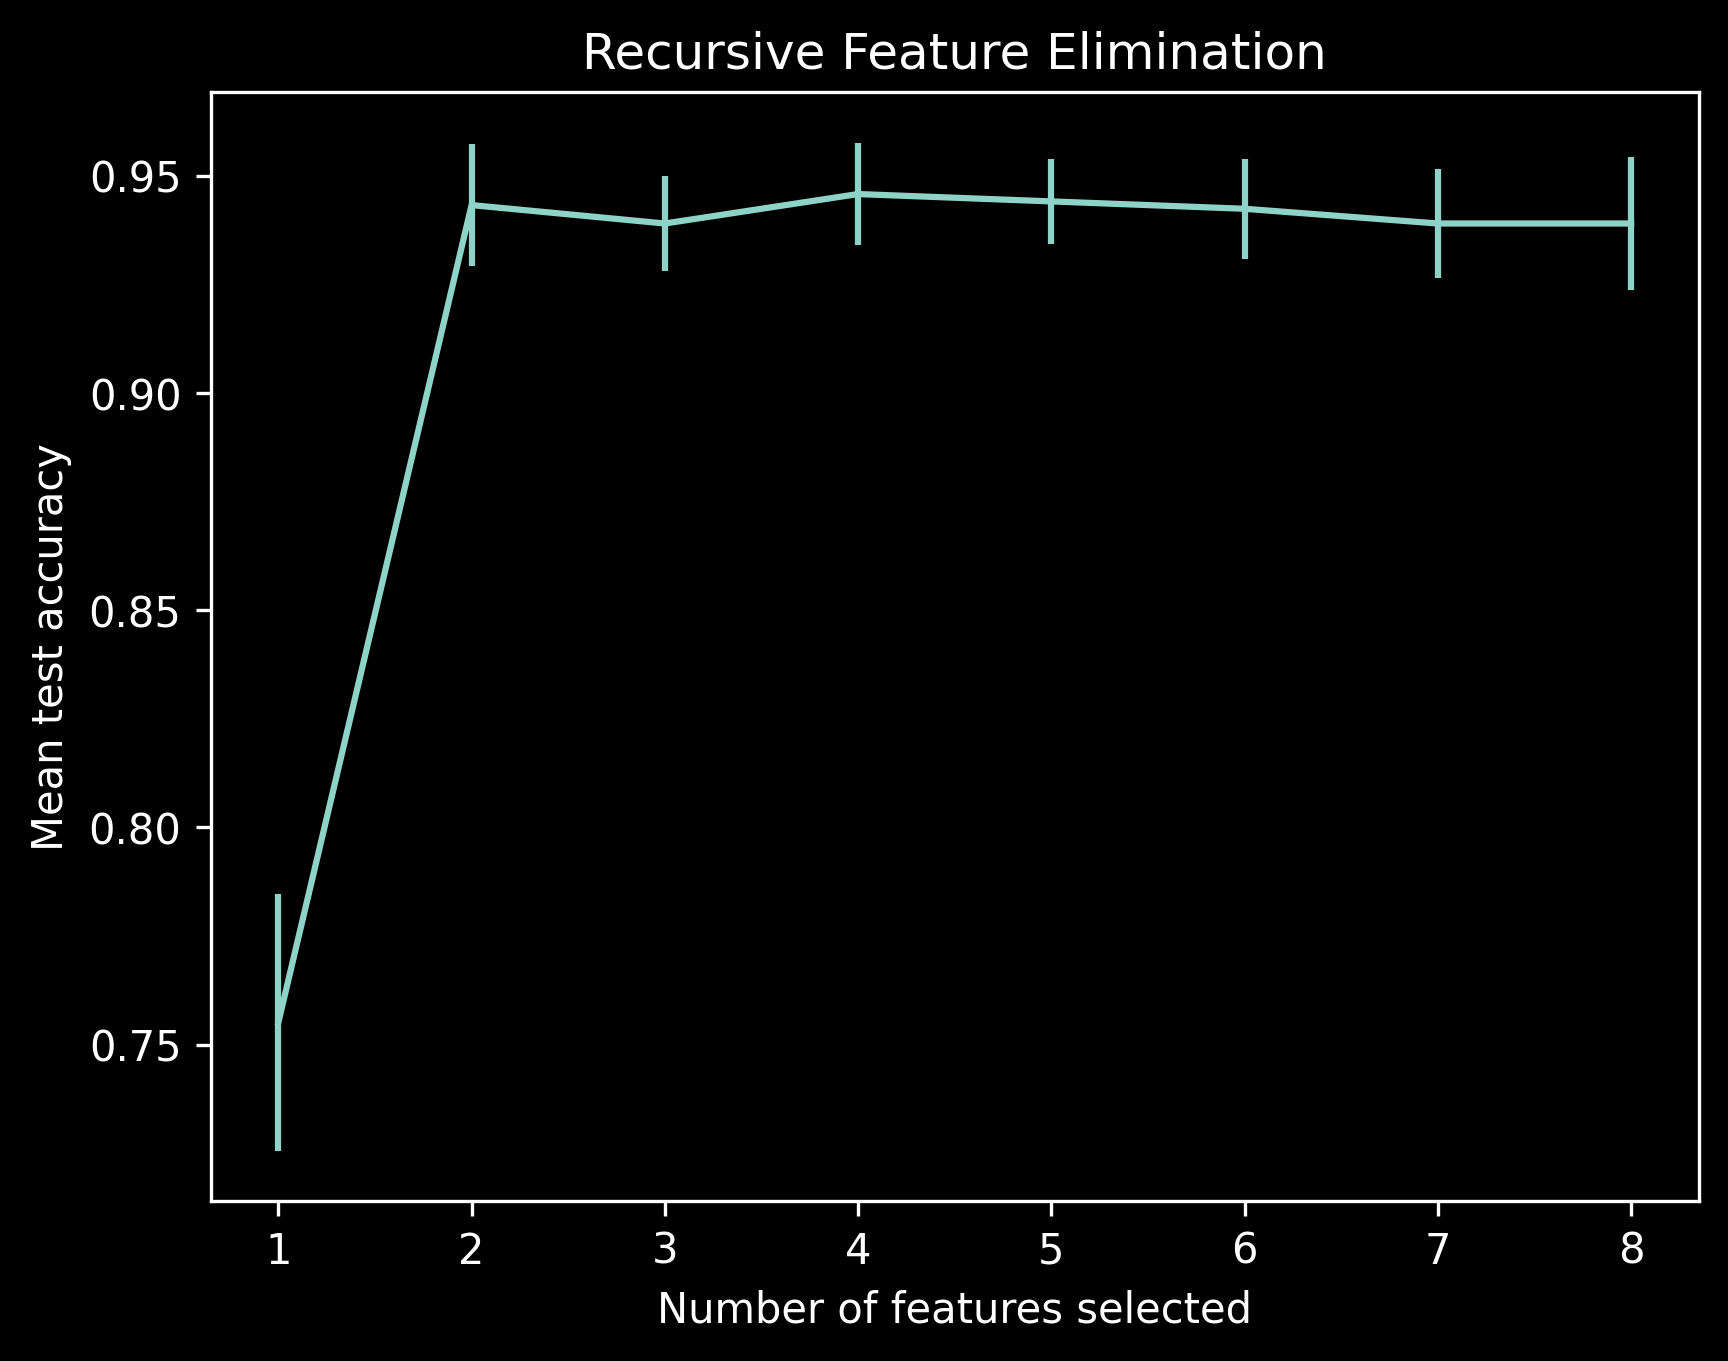

In [5]:
recursive_feature_elimination(clf, min_feats=1, cv=5, x_data_d=x_data_d, y_data_d=y_data_d)

### Test Log-Linearity

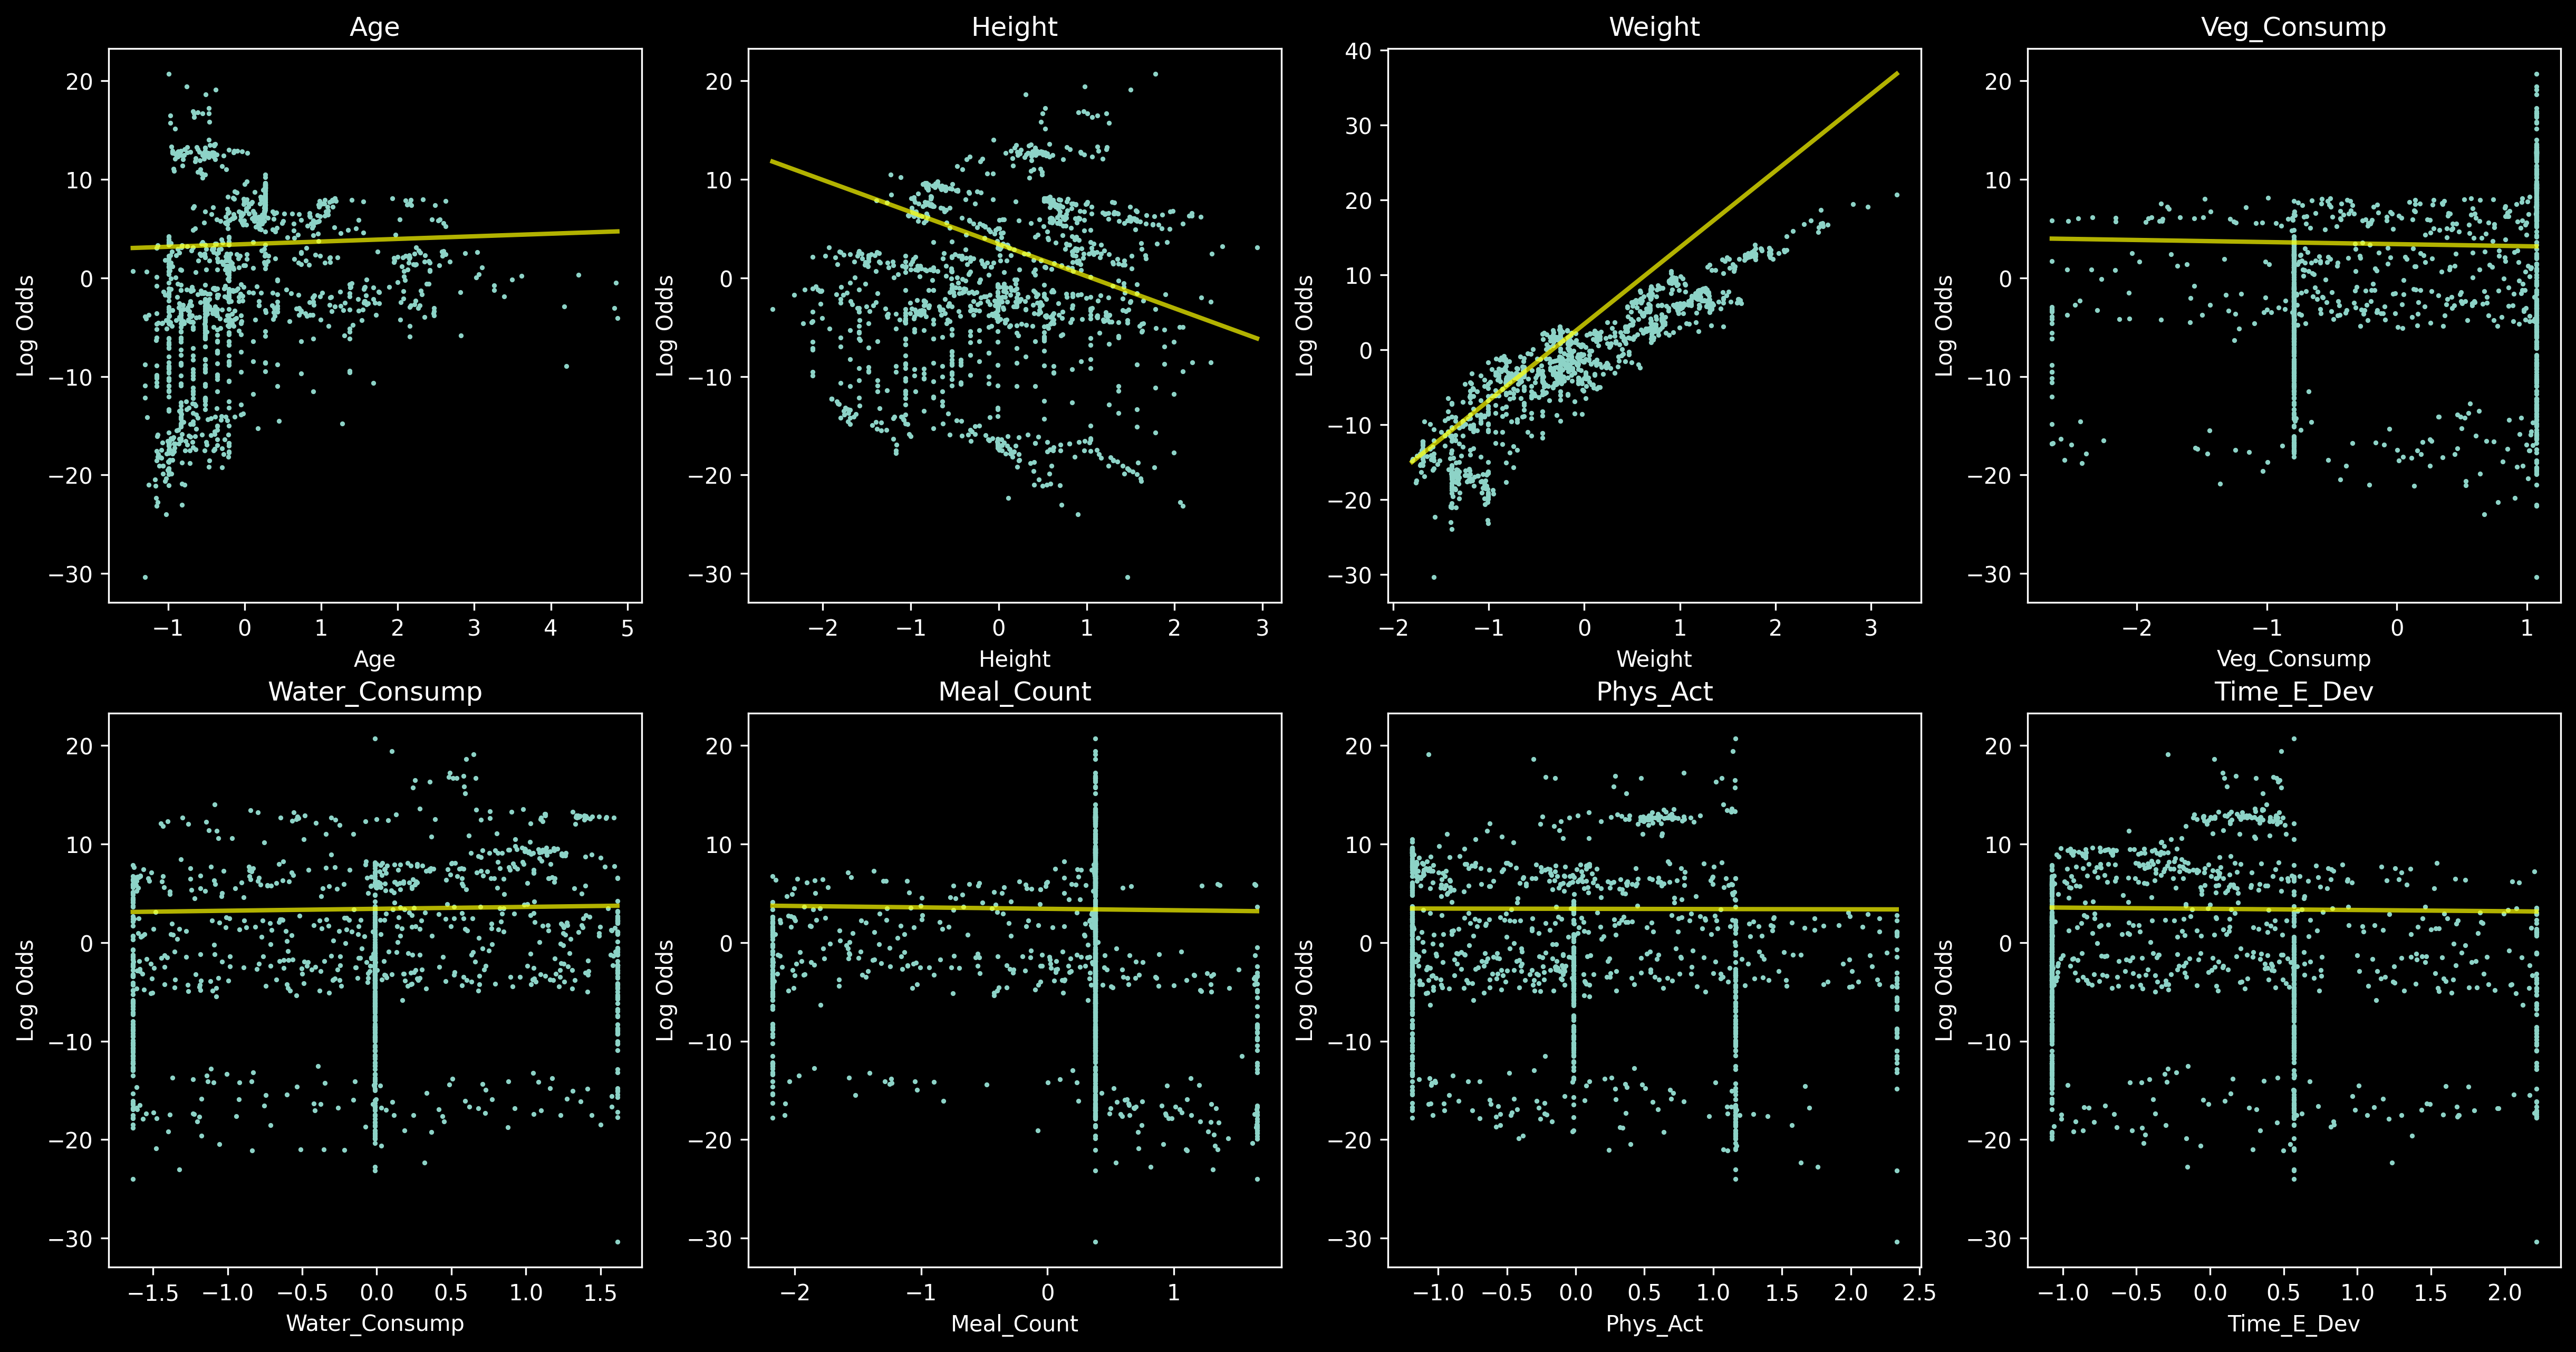

In [6]:
test_log_linearity(clf, class_index=3, x_data_d=x_data_d, y_data_d=y_data_d)

## Handling class imbalance

1- evaluate All resampling methods and cost sensitive

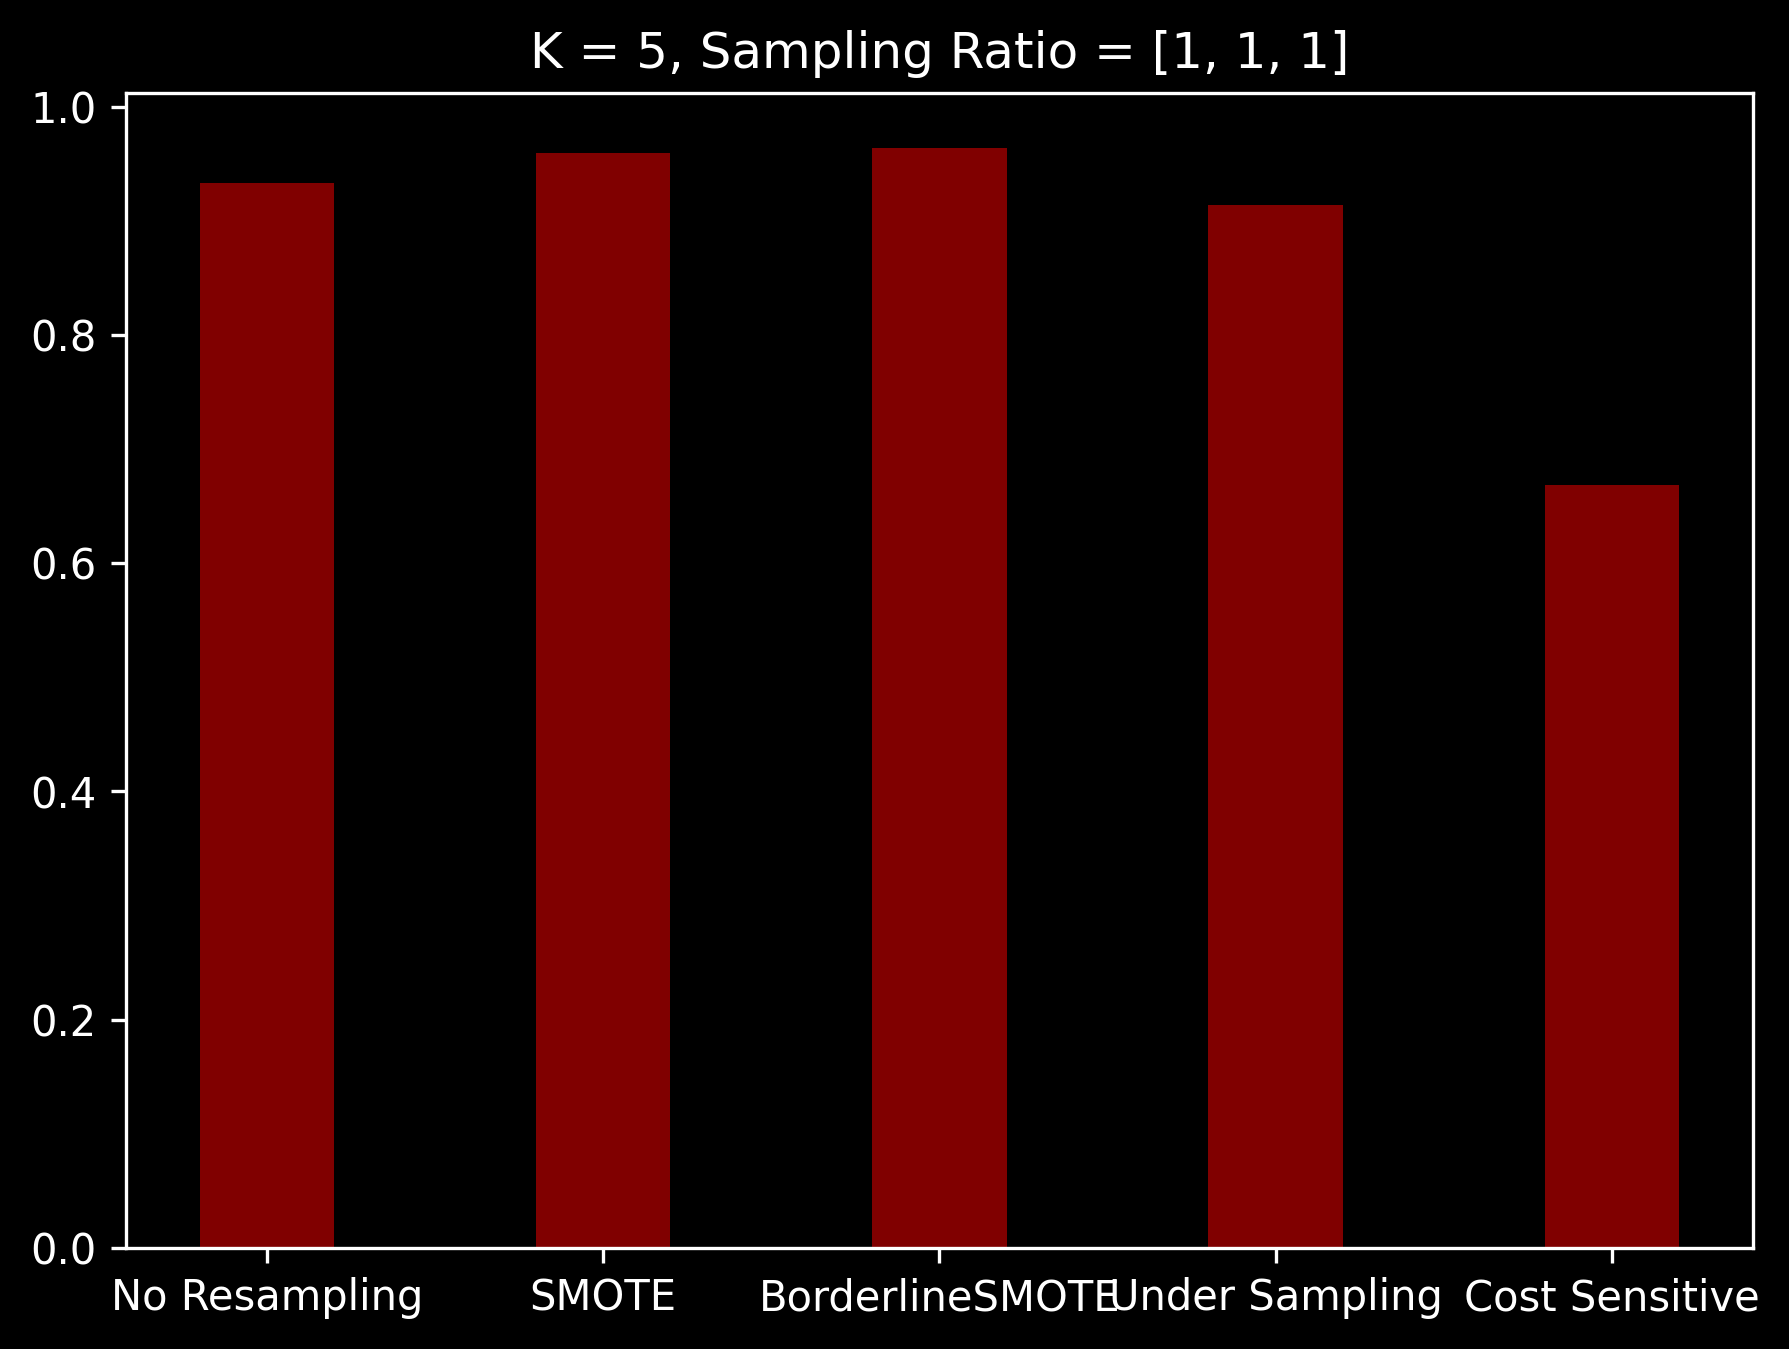

In [7]:
methods=['No Resampling', 'SMOTE','BorderlineSMOTE','Under Sampling','Cost Sensitive']
sample_ratio=[1,1,1]
k=5
evaluate_class_imbalance_handler_over_methods(x_data_d,y_data_d ,clf , methods=methods , sample_ratio=[1,1,1], k=k)

2-SMOTE with const k and multiple sample strategy

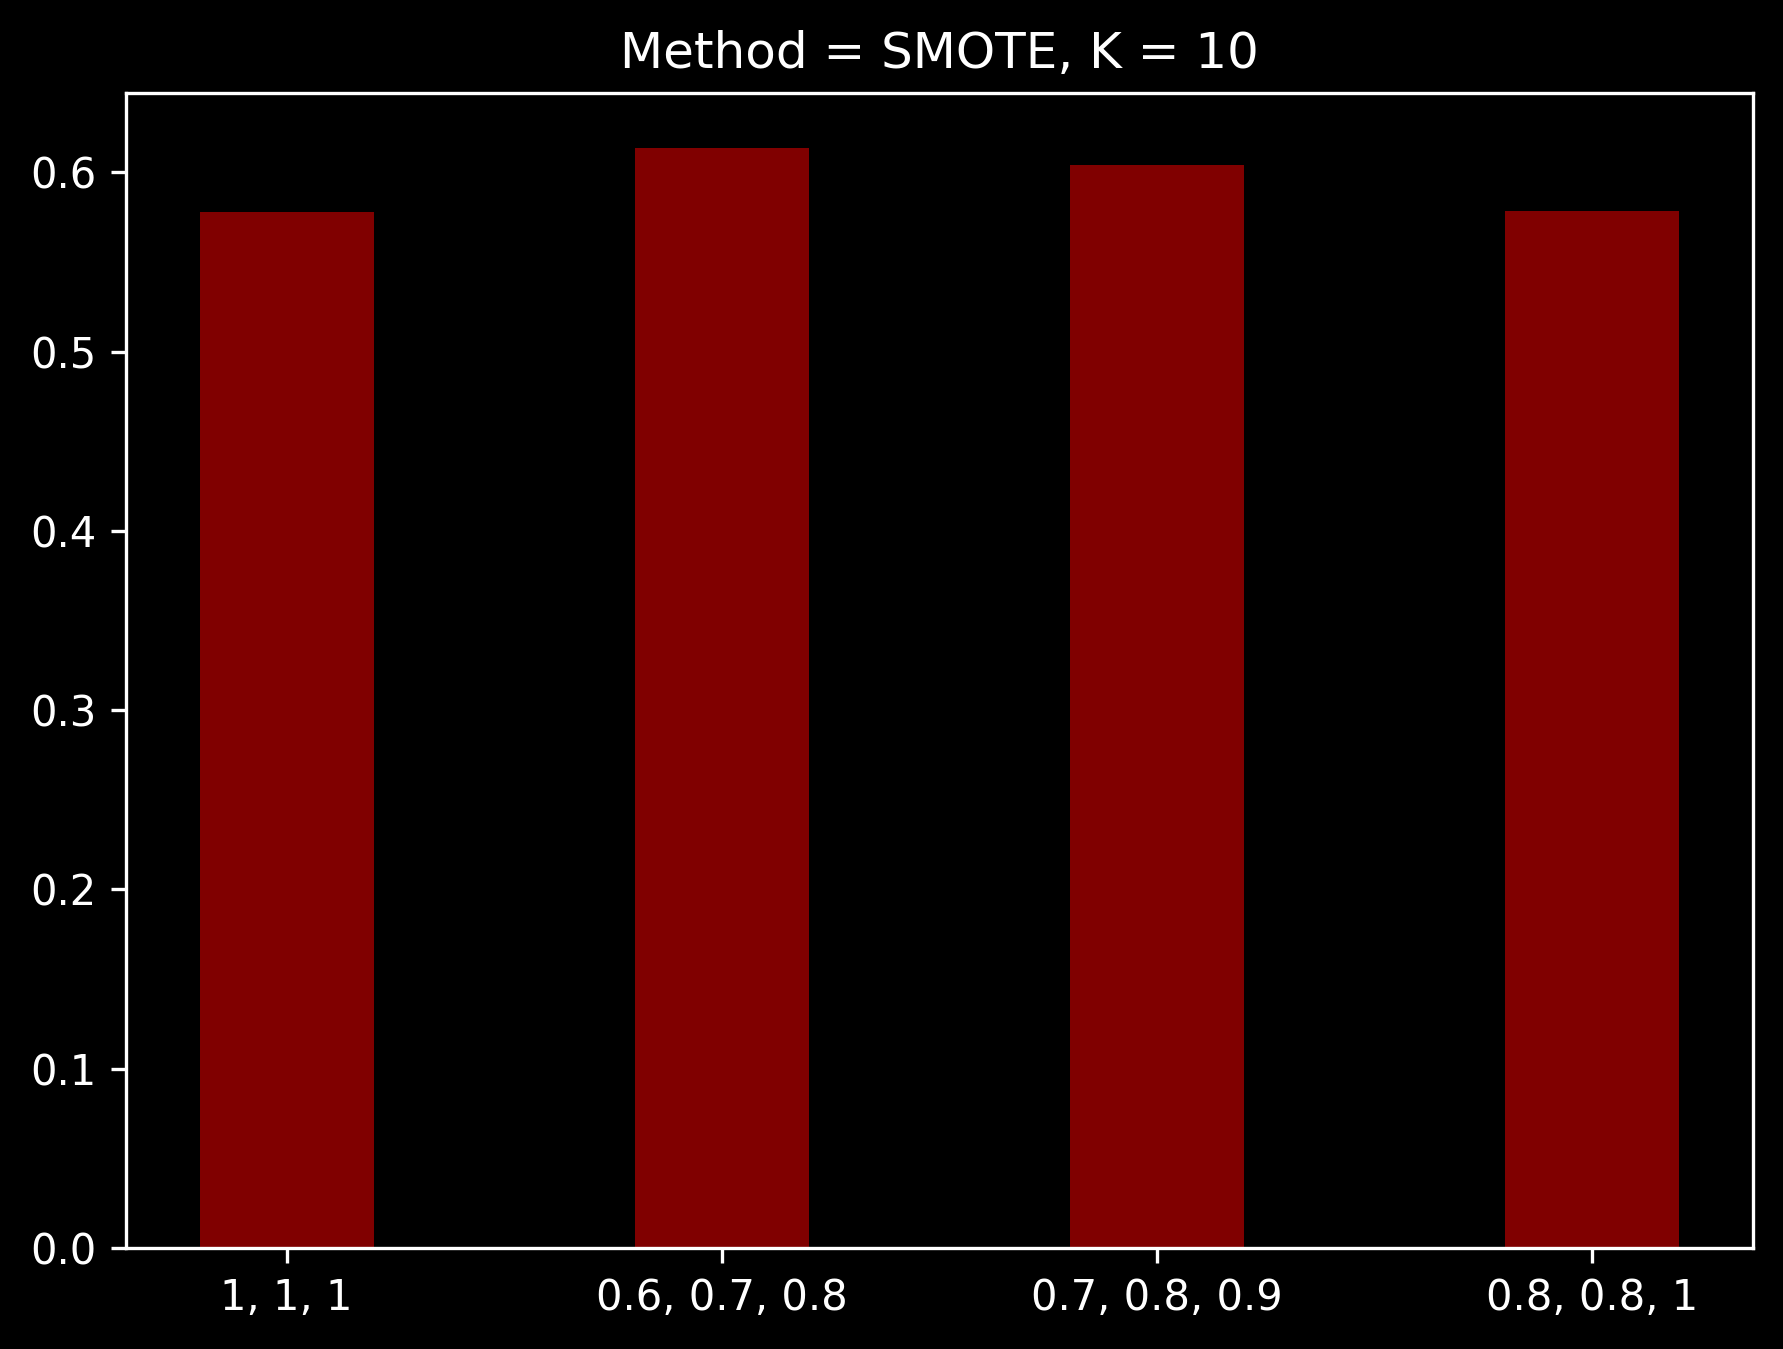

In [8]:
sample_ratios=[[1,1,1],[0.6,0.7,0.8],[0.7,0.8,0.9], [0.8,0.8,1] ]
k=10
evaluate_const_k_diff_sample_ratios(x_data_d,y_data_d ,clf , method='SMOTE' , k=k, sample_ratios=sample_ratios)

3-SMOTE with const sample strategy and multiple values of k

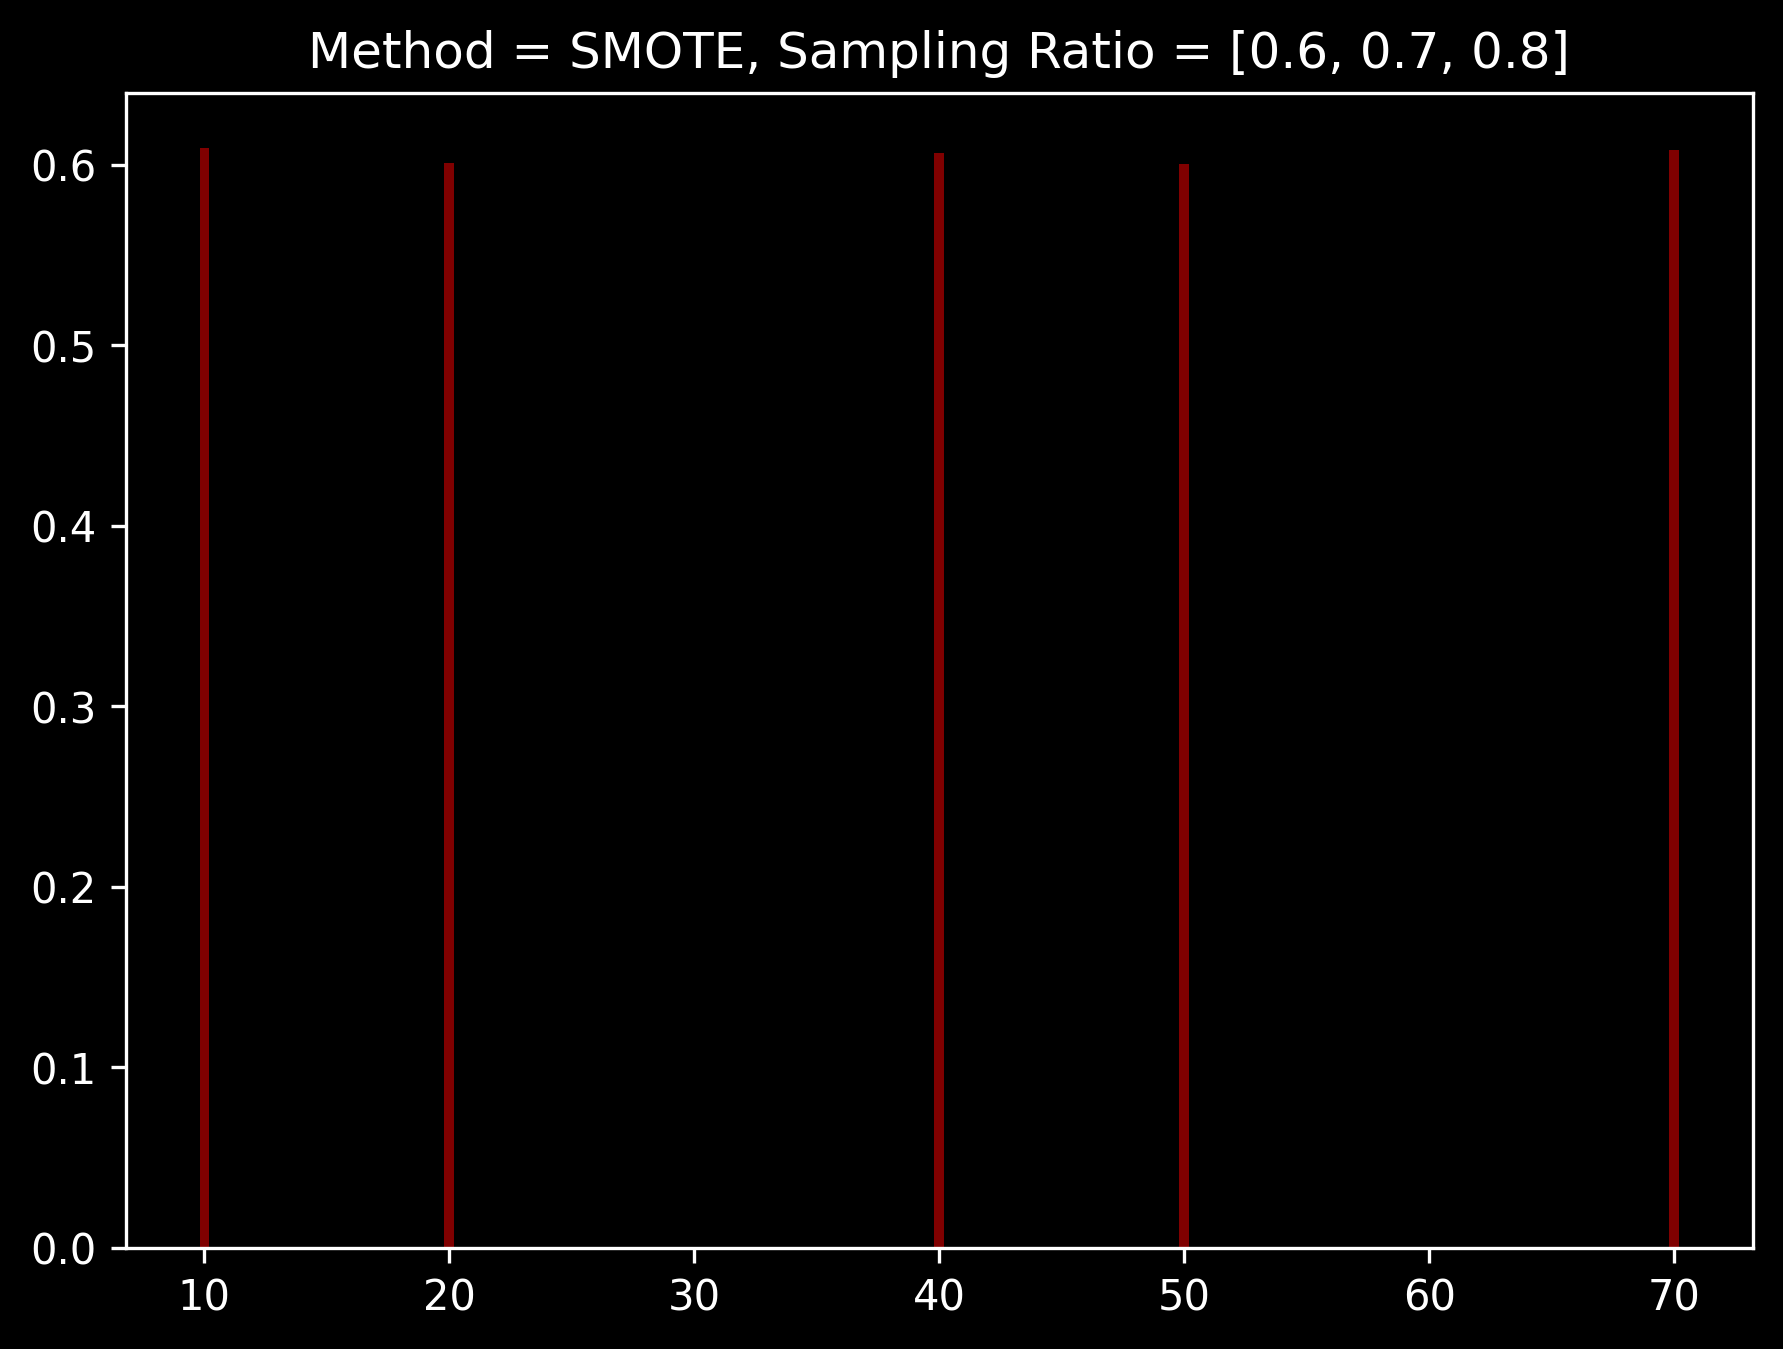

In [9]:
sample_ratio=[0.6,0.7,0.8] 
Ks=[10,20,40,50,70]
evaluate_const_sample_ratios_diff_k(x_data_d,y_data_d ,clf , method='SMOTE' , Ks=Ks, sample_ratio=sample_ratio)

4- BorderlineSMOTE with const k and multiple sample strategy

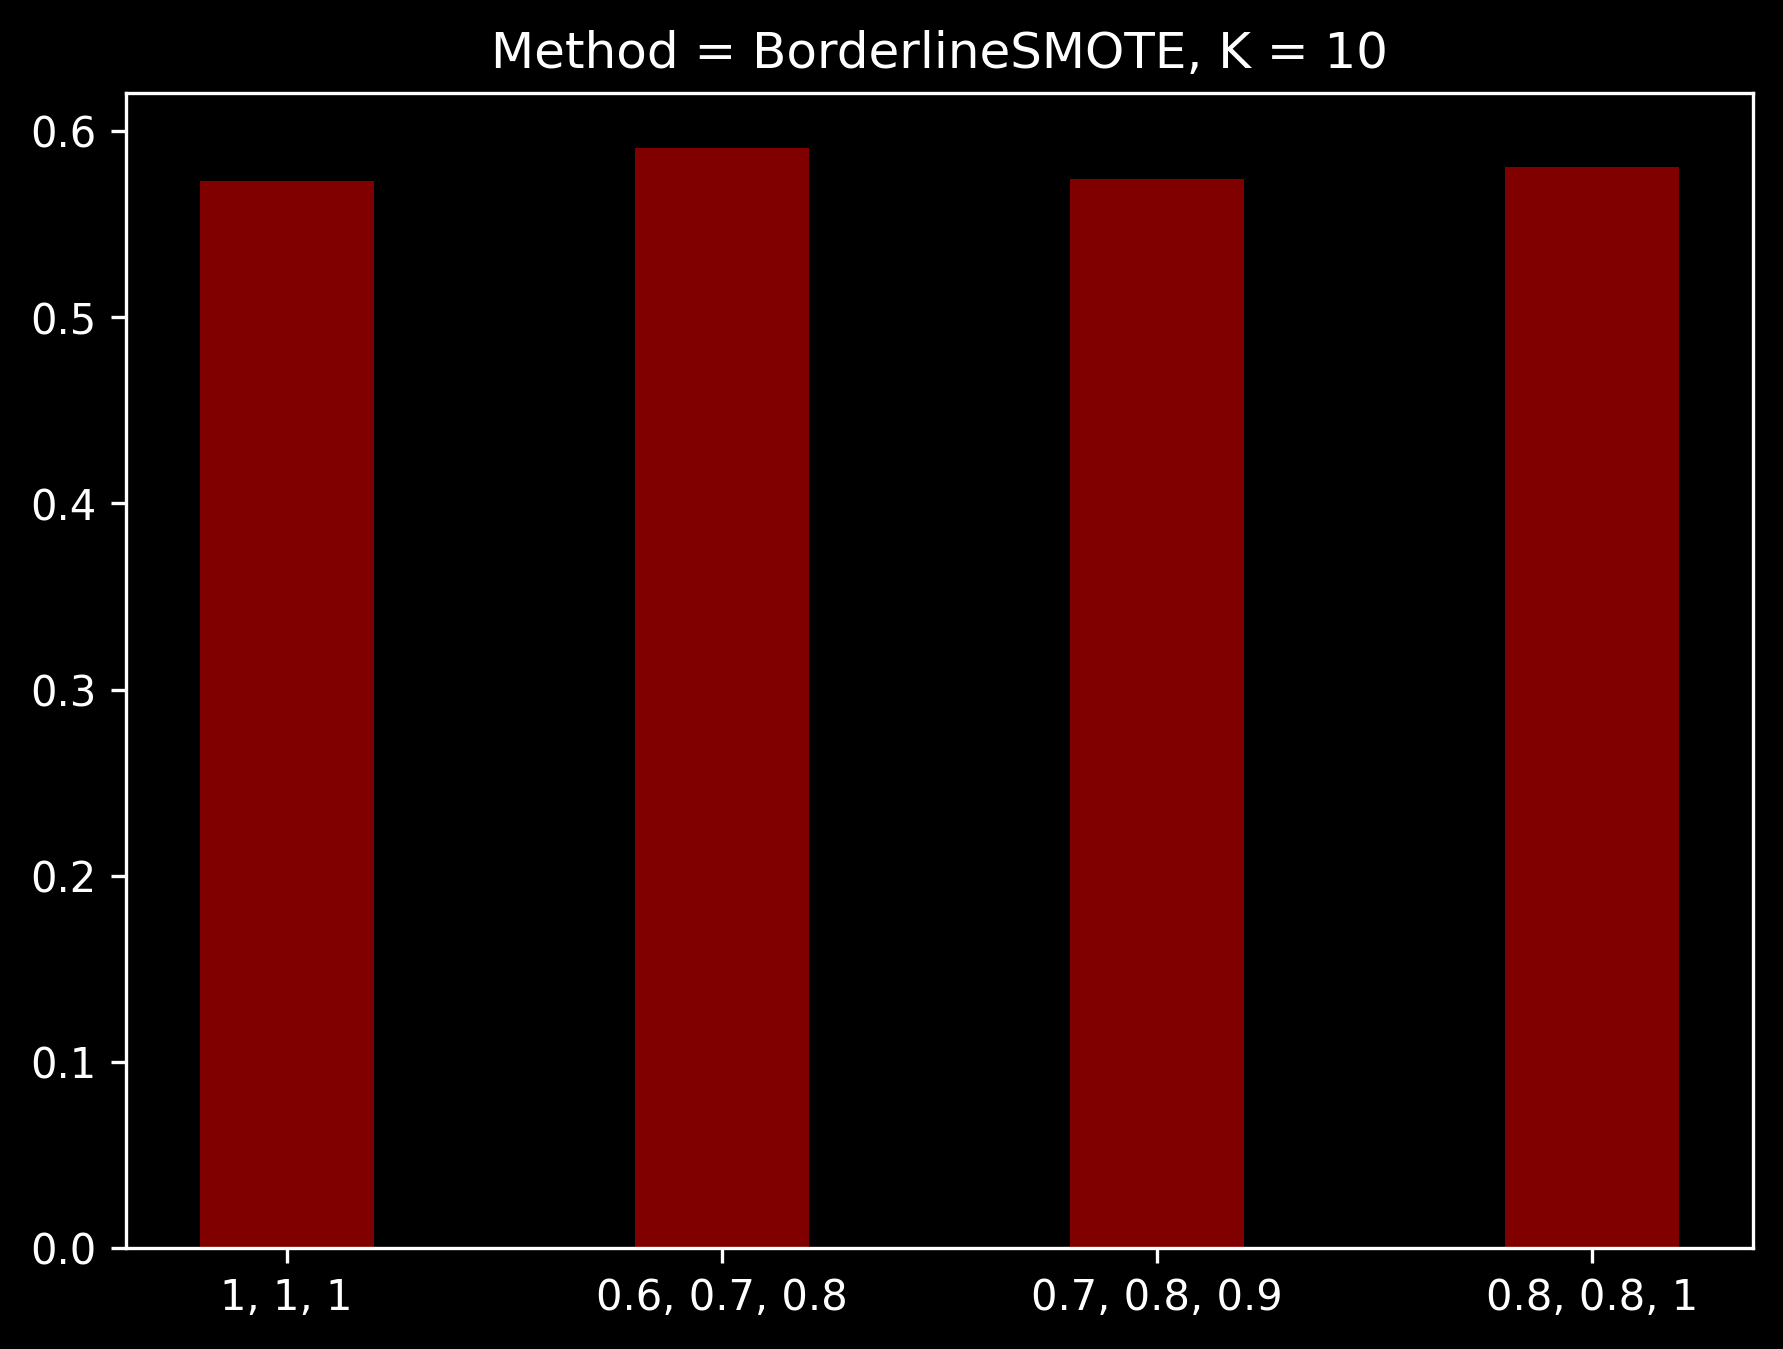

In [10]:
sample_ratios=[[1,1,1],[0.6,0.7,0.8],[0.7,0.8,0.9], [0.8,0.8,1] ]
k=10
evaluate_const_k_diff_sample_ratios(x_data_d,y_data_d ,clf , method='BorderlineSMOTE' , k=k, sample_ratios=sample_ratios)

5- BorderlineSMOTE with const sample strategy and multiple k values

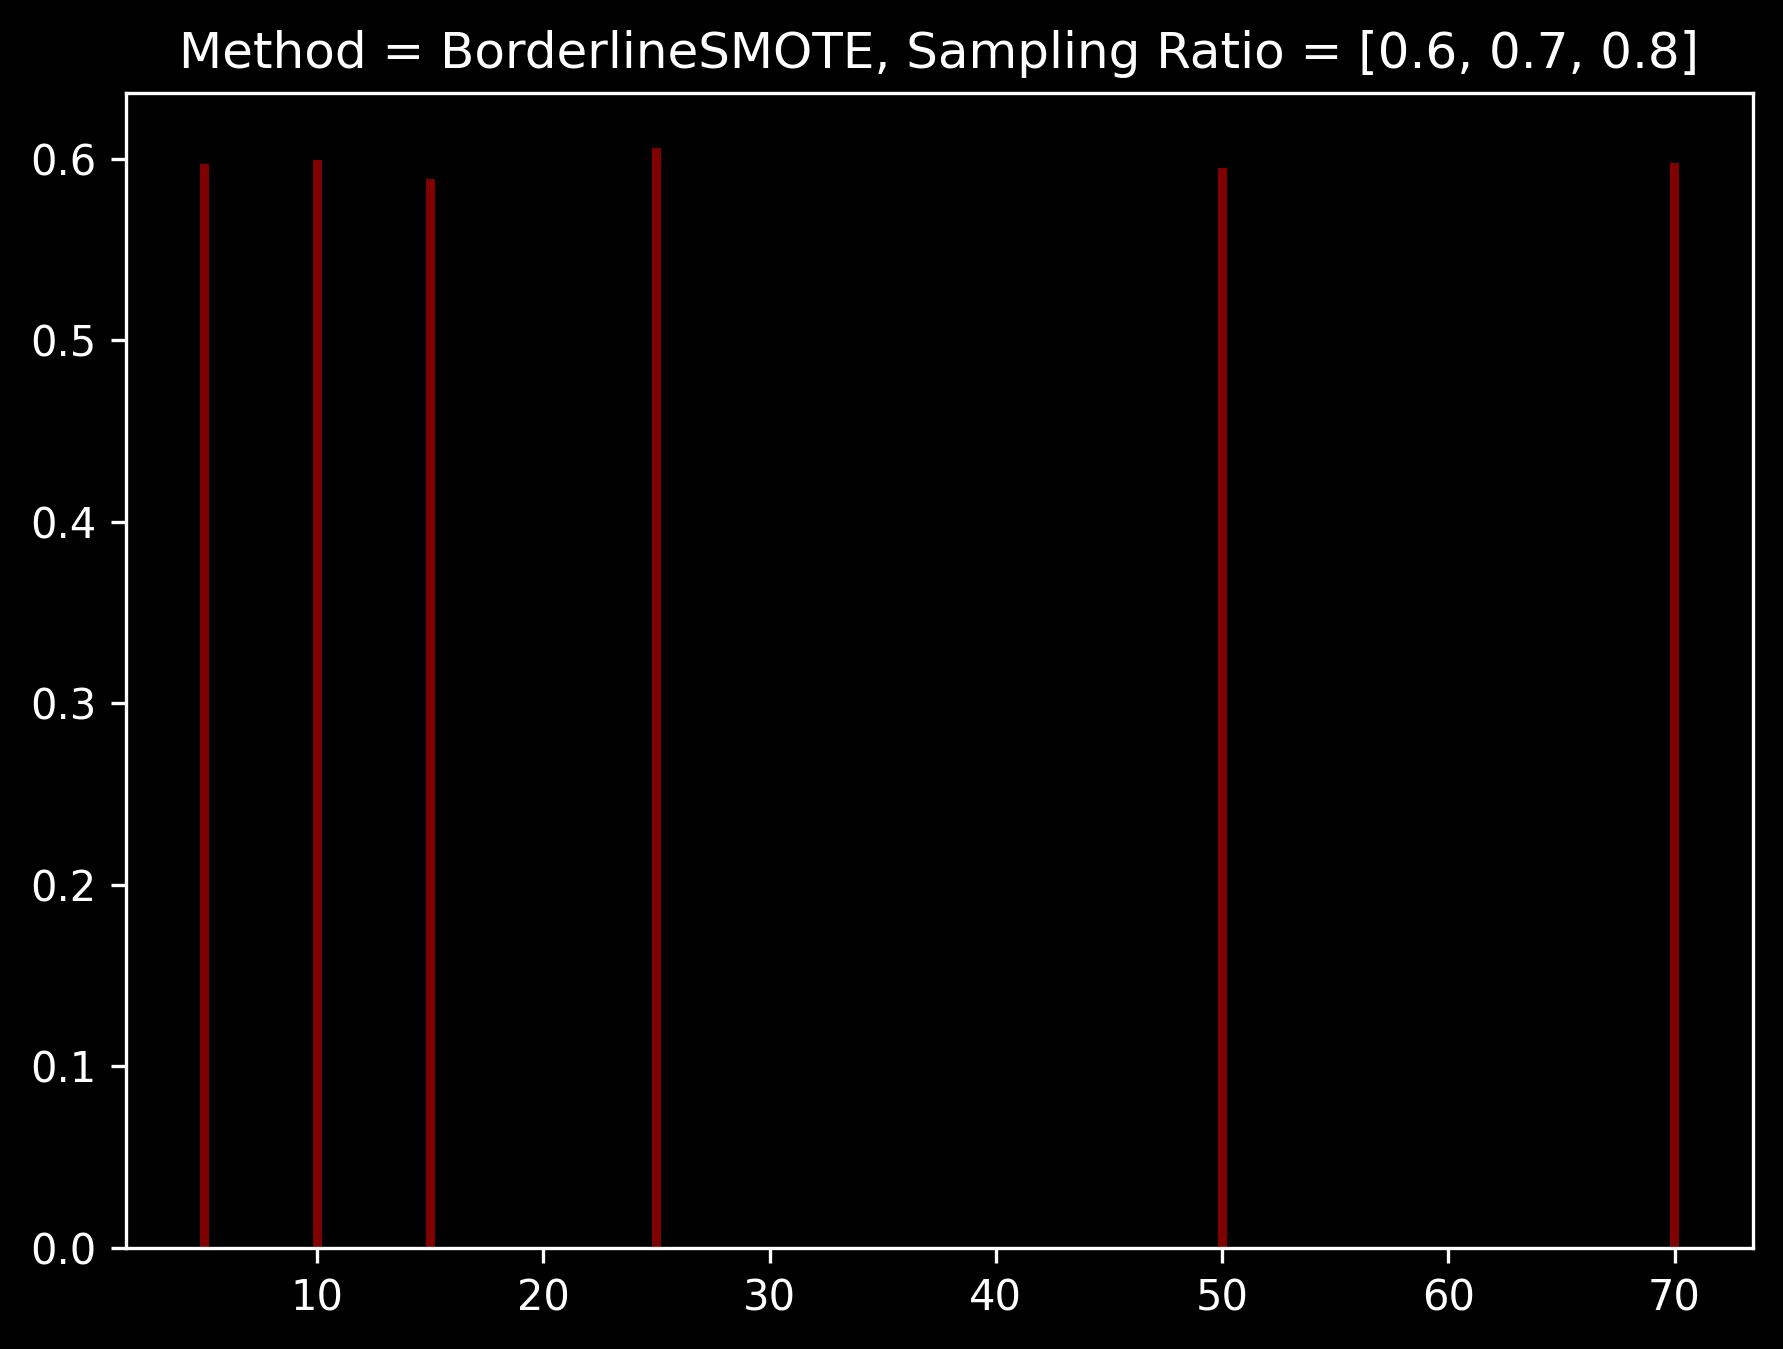

In [11]:
sample_ratio=[0.6,0.7,0.8] 
Ks=[5,10,15,25,50,70]
evaluate_const_sample_ratios_diff_k(x_data_d,y_data_d ,clf , method='BorderlineSMOTE' , Ks=Ks, sample_ratio=sample_ratio)

## Validation Curve

IndexError: index 0 is out of bounds for axis 0 with size 0

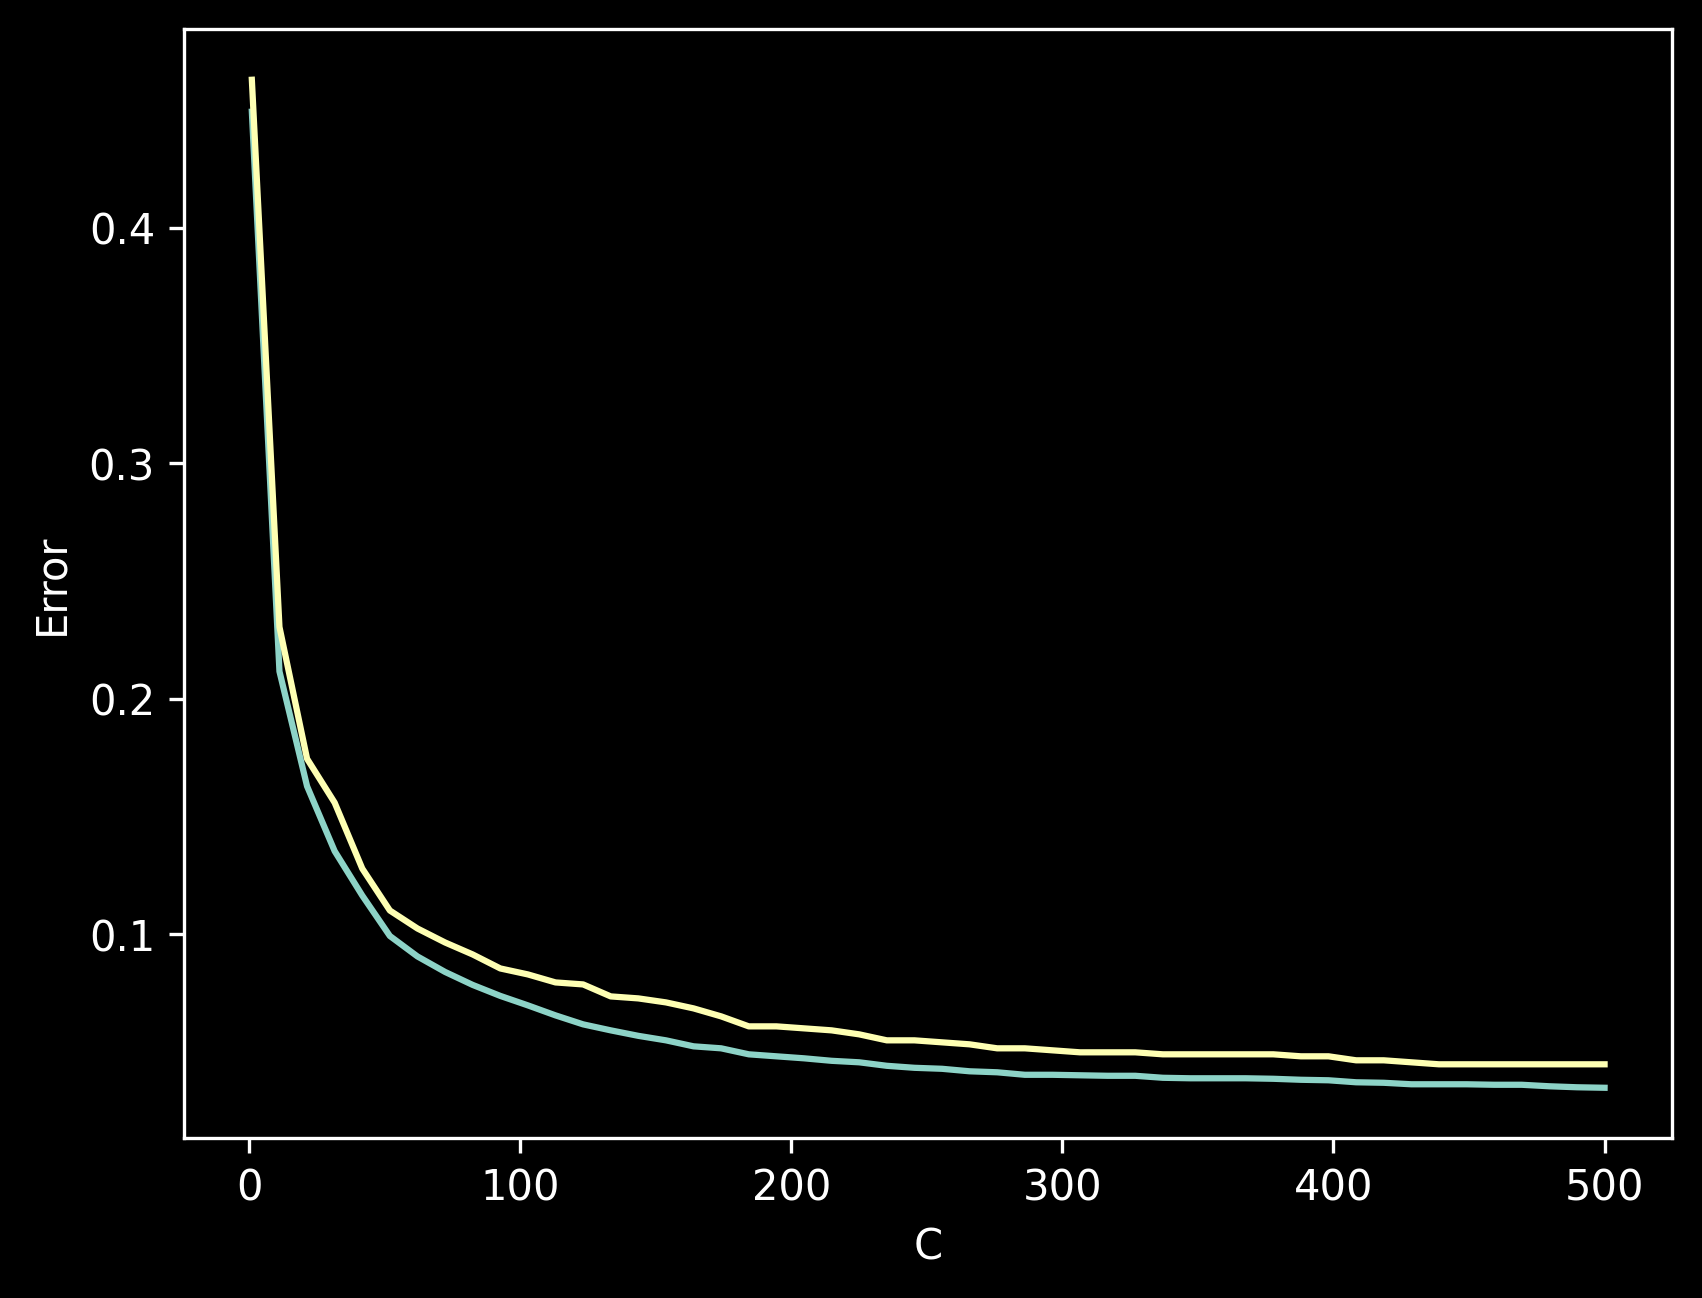

In [12]:
C = np.linspace(1, 500, 50)
validation_curves(clf, x_data_d, y_data_d,5, "C",C)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
validation_curves(clf, x_data_d, y_data_d,5, "solver",solver,categorical=True)

penalty = ['l1', 'l2', 'elasticnet', 'none']
validation_curves(clf, x_data_d, y_data_d,5, "penalty",penalty, categorical=True)

### Learning Curve

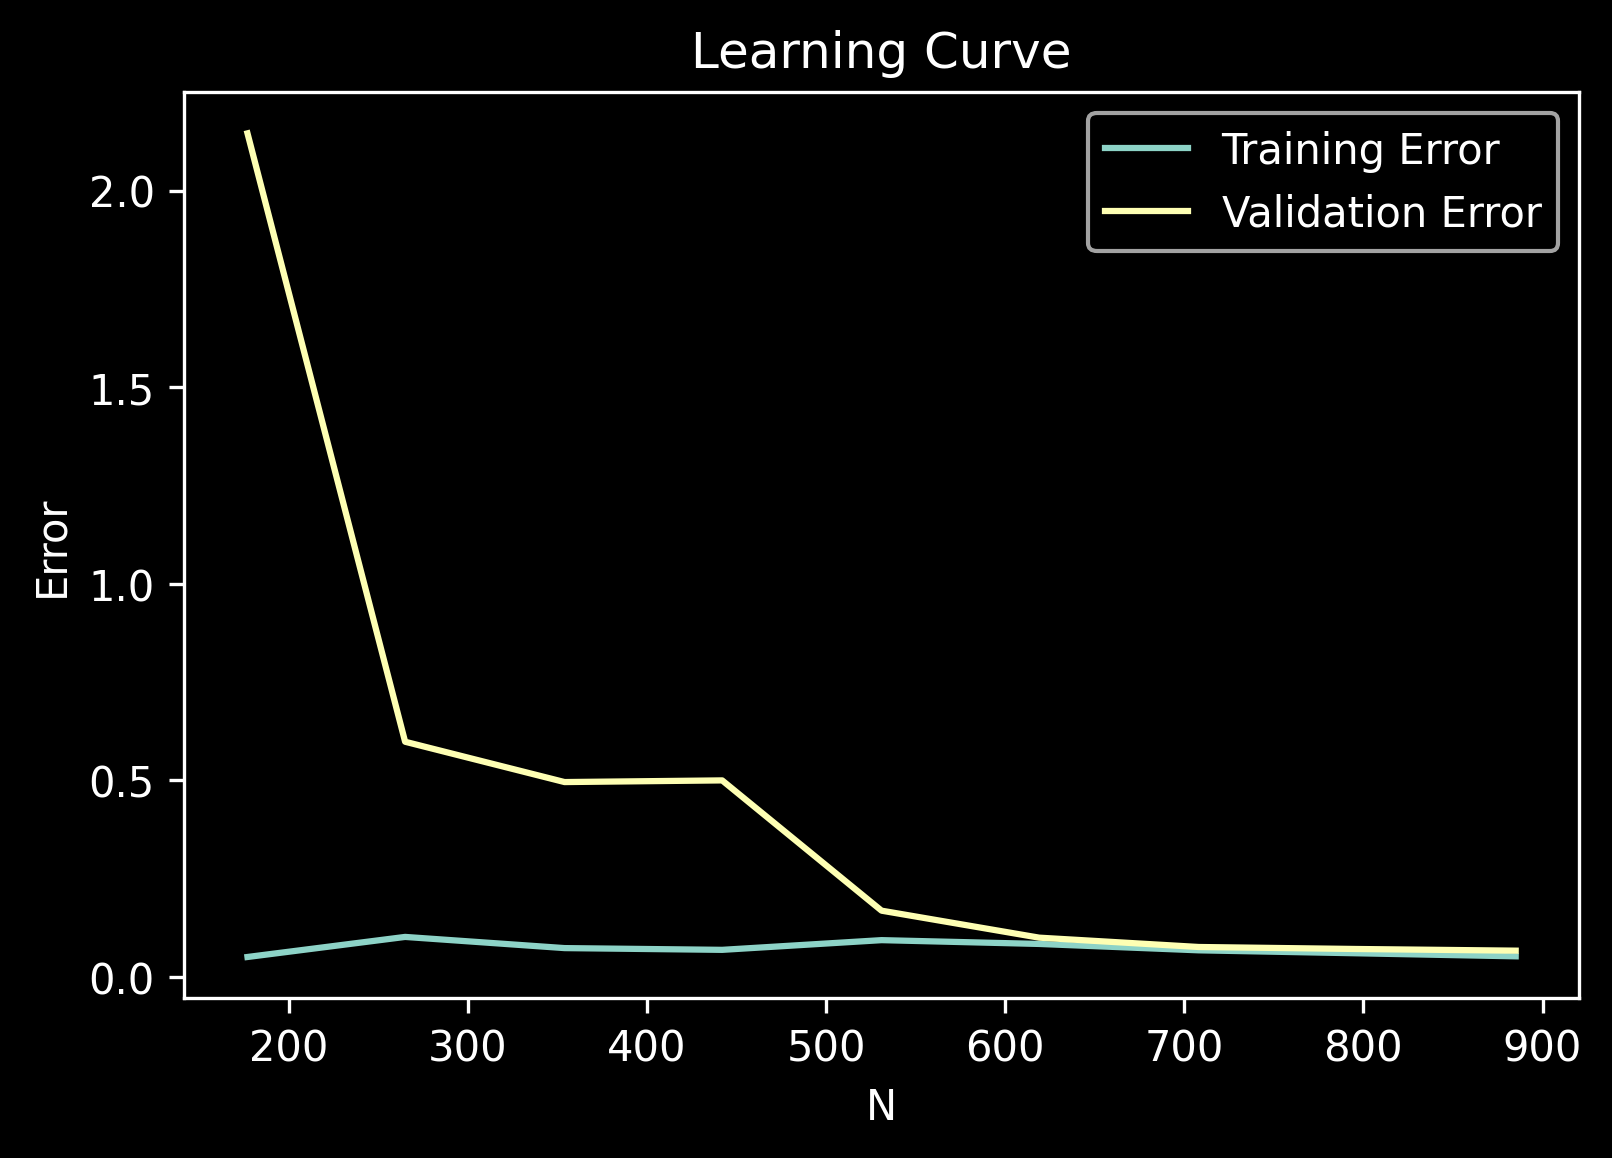

In [ ]:
train_sizes=np.linspace(0.1, 1.0, 10)
learning_curves(clf, x_data_d, y_data_d, cv=4,N=train_sizes)